In [1]:
using Pkg
Pkg.activate(@__DIR__)
using MCTSExperiments
using DecisionMakingProblems
using Statistics
using Plots
using LaTeXStrings
using BenchmarkTools

  Activating 

project at `e:\Dropbox (Personal)\Misc. Programs\Julia Code Testing\MCTSExperiments\examples`


In [2]:
using DecisionMakingProblems: isdone

In [3]:
twenty_forty_eight = DecisionMakingProblems.TwentyFortyEight(γ=0.99)

mdp = DecisionMakingProblems.MDP(twenty_forty_eight);

In [4]:
π_rand(s) = rand(DecisionMakingProblems.DIRECTIONS)

π_rand (generic function with 1 method)

In [5]:
rollouts_random = [ MCTSExperiments.rollout(mdp, DecisionMakingProblems.initial_board(), π_rand, 10000, isdone) for i in 1:100 ]

print("$(mean(rollouts_random)) ± $(std(rollouts_random))")

521.4166814409084 ± 163.07513861561037

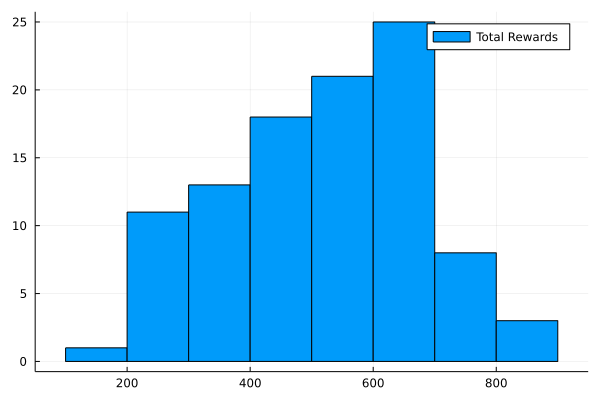

In [6]:
histogram(rollouts_random, label="Total Rewards")

In [7]:
mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

board = DecisionMakingProblems.initial_board()

@benchmark MCTSExperiments.rollout(mdp, board, mcts_problem, 10000, isdone)

In [ ]:
mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

rollouts_mcts_U0 = [ MCTSExperiments.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 10000, isdone) for i in 1:100 ]

print("$(mean(rollouts_mcts_U0)) ± $(std(rollouts_mcts_U0))")

In [ ]:
histogram(rollouts_mcts_U0, label=L"\mathrm{MCTS} \quad U(s) = 0")

In [ ]:
init = DecisionMakingProblems.initial_board()

In [ ]:
@benchmark MCTSExperiments.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 10000, isdone)

In [18]:
mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> MCTSExperiments.rollout(mdp, s, π_rand, 100) # U
)

MonteCarloTreeSearch(MDP(0.99, nothing, (0x00, 0x01, 0x02, 0x03), nothing, DecisionMakingProblems.var"#27#29"{DecisionMakingProblems.TwentyFortyEight}(DecisionMakingProblems.TwentyFortyEight
  γ: Float64 0.99
), DecisionMakingProblems.var"#28#30"{DecisionMakingProblems.TwentyFortyEight}(DecisionMakingProblems.TwentyFortyEight
  γ: Float64 0.99
)), Dict{Tuple{UInt64, UInt8}, Float64}(), Dict{Tuple{UInt64, UInt8}, Float64}(), 10, 100, 5.0, var"#17#18"())

In [ ]:
for i in 1:100
    mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
        mdp, # 𝒫
        Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
        Dict{Tuple{UInt64, UInt8}, Float64}(), # N
        10, # d
        100, # m
        5.0, # c
        s -> MCTSExperiments.rollout(mdp, s, π_rand, 100) # U
    )
end
rollouts_mcts_U = [ MCTSExperiments.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 10000, isdone) for i in 1:100 ]

print("$(mean(rollouts_mcts_U)) ± $(std(rollouts_mcts_U))")

In [ ]:
histogram(rollouts_mcts_U, label=L"\mathrm{MCTS} \quad U(s) = \mathbb{E}\,[R\,|\,\pi_{rand}]")

In [ ]:
mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

DecisionMakingProblems.play_game(s -> mcts_problem(s))